# Import Libraries

In [3]:
ls | grep pandas


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# SET UP

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Datasets

In [6]:
df = pd.read_csv('/Users/Jai/Documents/Git_remote/DataScience/Capstone/data_sources/dataset1/US_healthcare_data-2122020.csv')

In [7]:
# Separate features and target
X = df.drop(columns=['readmitted'])  # Drop the target column
y = df['readmitted']  # Extract the target column


# Split train and test data set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

##### Discover and visualize the data to gain insights

Saving figure scatter_matrix_plot


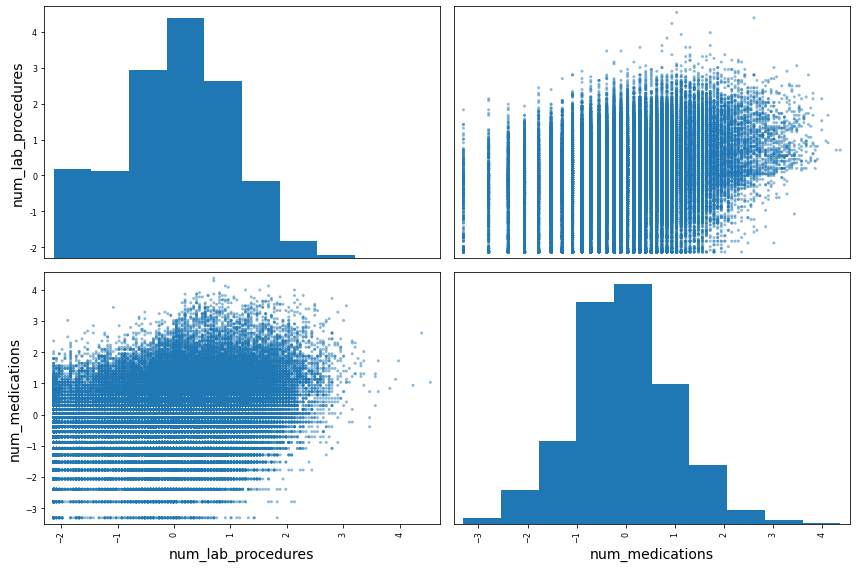

In [9]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["readmitted", "num_lab_procedures", "num_medications",
              "race"]
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

#### 4. Prepare the data for Machine Learning algorithms

In [10]:
y_train = y_train.replace({'<30': 1, 'NO': 0})

check missing values

In [11]:
# Most Machine Learning algorithms cannot work with missing feature values, so let’s create a few functions to take care of them.
# You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options:
# • Get rid of the corresponding districts.
# • Get rid of the whole attribute.
# • Set the values to some value (zero, the mean, the median, etc.).
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,...,metformin,repaglinide,glipizide,insulin,change,diabetesMed,age_derived,count_Steady,count_Down,count_Up


# Data Preprocessing

Encoding

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)



In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81412 entries, 92621 to 46961
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      81412 non-null  object 
 1   gender                    81412 non-null  object 
 2   age                       81412 non-null  object 
 3   admission_type_id         81412 non-null  object 
 4   discharge_disposition_id  81412 non-null  object 
 5   admission_source_id       81412 non-null  object 
 6   time_in_hospital          81412 non-null  float64
 7   num_lab_procedures        81412 non-null  float64
 8   num_medications           81412 non-null  float64
 9   number_outpatient         81412 non-null  float64
 10  number_emergency          81412 non-null  float64
 11  number_inpatient          81412 non-null  float64
 12  diag_1                    81412 non-null  object 
 13  diag_2                    81412 non-null  object 
 14  di

Principal Component Analysis

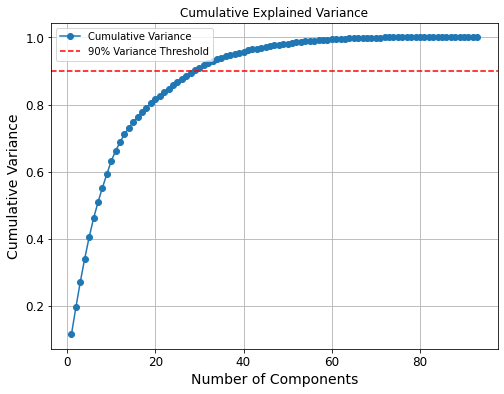

Number of components for 90% variance: 29


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Fit PCA for analysis
pca_temp = PCA()
pca_temp.fit(X_train_preprocessed)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.grid()
plt.show()

# Find the number of components to retain 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components for 90% variance: {n_components_90}")


Clustering

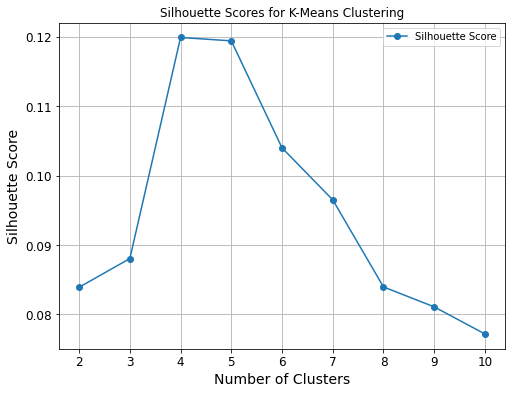

Optimal number of clusters: 4


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform PCA with the selected number of components
pca = PCA(n_components=n_components_90)
X_train_pca = pca.fit_transform(X_train_preprocessed)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_scores.append(silhouette_score(X_train_pca, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

# Choose the optimal number of clusters
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

# Add cluster labels as a new feature
X_train_clustered = np.hstack((X_train_pca, cluster_labels.reshape(-1, 1)))


### SMOTE for oversampling minority and undersampling majority class

In [16]:
from imblearn.combine import SMOTEENN

# Initialize SMOTE
smote = SMOTEENN(random_state=42)

# Apply SMOTE to the PCA-transformed and clustered data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_clustered, y_train)

# Verify the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_balanced))


Class distribution after SMOTE: Counter({1: 71665, 0: 37784})


# Modeling

Random Forest

In [86]:

#Using random search 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import time


# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Parameter distributions
param_dist = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [8],
    'class_weight': ['balanced']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=4,  # Limit number of combinations
    scoring='roc_auc',
    cv=3,  # Reduce folds
    n_jobs=-1,
    random_state=42
)

start_time = time.time()

# Fit RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)

print(f"Training completed in {time.time() - start_time:.2f} seconds.")

# Best model and parameters
best_rf = random_search.best_estimator_
print("Best Random Forest Parameters:", random_search.best_params_)


The total space of parameters 1 is smaller than n_iter=4. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Training completed in 118.15 seconds.
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 20, 'class_weight': 'balanced'}


Save the best model in pickle files

In [87]:
import pickle
# Save the best model to a pickle file
model_filename = 'best_random_forest2.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf, file)

print(f"Best model saved as {model_filename}")

Best model saved as best_random_forest2.pkl


Load the model

In [88]:
# Load the saved model
with open('best_random_forest2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)




## Prediction

Training prediction

In [18]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Evaluate training performance
y_train_pred = loaded_model.predict(X_train_balanced)
y_train_pred_prob = loaded_model.predict_proba(X_train_balanced)[:, 1]  # Probabilities for ROC AUC


In [19]:
# Training metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_prob)
print("Training Performance:")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Accuracy: {train_accuracy:.4f}, ROC AUC: {train_roc_auc:.4f}")


Training Performance:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78     37784
           1       0.91      0.84      0.87     71665

    accuracy                           0.84    109449
   macro avg       0.82      0.84      0.82    109449
weighted avg       0.84      0.84      0.84    109449

Accuracy: 0.8362, ROC AUC: 0.9140


Precision, Recall, F1

In [20]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,f1_score

# Training Metrics
train_precision = precision_score(y_train_balanced, y_train_pred)
train_recall = recall_score(y_train_balanced, y_train_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)
train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_prob)

print("Training Performance Metrics:")
print(f"Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1-Score: {train_f1:.2f}, ROC AUC: {train_roc_auc:.2f}")



Training Performance Metrics:
Precision: 0.91, Recall: 0.84, F1-Score: 0.87, ROC AUC: 0.91


## RF Model evaluation

Feature importance

In [21]:
feature_importances = loaded_model.feature_importances_

In [22]:

#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out())
# Combine numerical and categorical feature names
numerical_features = numerical_cols.tolist()
all_features = numerical_features + cat_one_hot_attribs

# Sort feature importance scores with their corresponding feature names
sorted_features = sorted(zip(loaded_model.feature_importances_, all_features), reverse=True)

# Print top 10 features
print("Top 10 Features by Importance:")
for importance, feature in sorted_features[:20]:
    print(f"{feature}: {importance:.4f}")

Top 10 Features by Importance:
time_in_hospital: 0.0837
age_derived: 0.0698
number_outpatient: 0.0619
admission_type_id_Elective: 0.0397
gender_Male: 0.0397
num_lab_procedures: 0.0377
count_Steady: 0.0371
number_emergency: 0.0366
num_medications: 0.0334
count_Up: 0.0332
age_[60-70): 0.0314
admission_type_id_Emergency: 0.0310
admission_type_id_Urgent: 0.0306
admission_type_id_Others: 0.0300
number_inpatient: 0.0294
race_AfricanAmerican: 0.0291
count_Down: 0.0288
age_[80-100): 0.0287
number_diagnoses: 0.0282
age_[70-80): 0.0279


### Predict Test data using RF 

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77     18083
           1       0.17      0.54      0.25      2271

    accuracy                           0.65     20354
   macro avg       0.54      0.60      0.51     20354
weighted avg       0.84      0.65      0.71     20354

ROC AUC Score: 0.6343996552128277
Test Performance Metrics:
Precision: 0.17, Recall: 0.54, F1-Score: 0.25, ROC AUC: 0.63
Confusion Matrix:


Text(0.5, 1.0, 'Confusion Matrix')

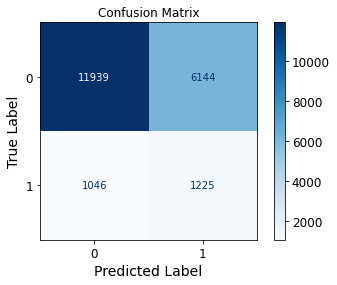

In [23]:
#x_test= strat_test_set.drop("readmitted", axis=1) # drop labels for test set
#y_test = strat_test_set["readmitted"].copy()

# Encode YES as 1 and NO as 0
y_test = y_test.replace({'<30': 1, 'NO': 0})


# Evaluate on test data
X_test_preprocessed = preprocessor.transform(X_test)
X_test_pca = pca.transform(X_test_preprocessed)
X_test_clustered = np.hstack((X_test_pca, kmeans.predict(X_test_pca).reshape(-1, 1)))



y_pred = loaded_model.predict(X_test_clustered)
y_pred_proba = loaded_model.predict_proba(X_test_clustered)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))



# Test Metrics
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Test Performance Metrics:")
print(f"Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1-Score: {test_f1:.2f}, ROC AUC: {test_roc_auc:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

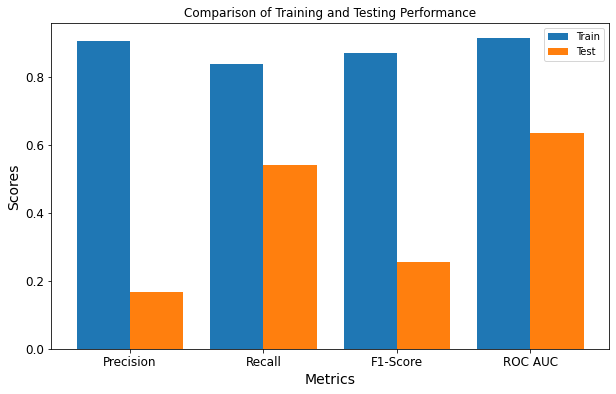

In [24]:
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC AUC']
train_scores = [train_precision, train_recall, train_f1, train_roc_auc]
test_scores = [test_precision, test_recall, test_f1, test_roc_auc]

# Bar plot
x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar([p + 0.4 for p in x], test_scores, width=0.4, label='Test', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Training and Testing Performance')
plt.legend()
plt.show()


Threshold Analysis

/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedM

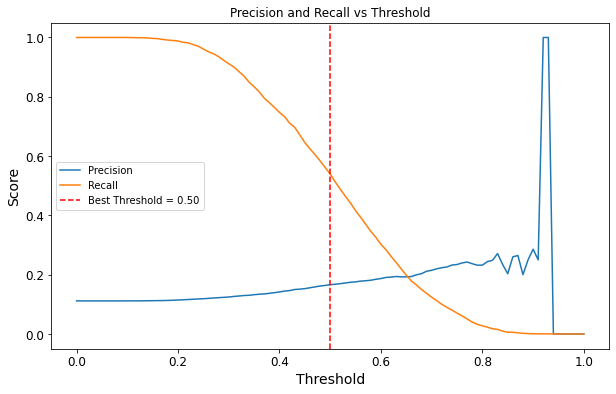

In [25]:

# Get model probabilities
y_prob = loaded_model.predict_proba(X_test_clustered)[:, 1]  # Probabilities for the positive class

thresholds = np.arange(0.0, 1.01, 0.01)  # Range of thresholds
results = []

for thresh in thresholds:
    y_pred = (y_prob >= thresh).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Threshold': thresh, 'Precision': precision, 'Recall': recall, 'F1': f1})

results_df = pd.DataFrame(results)

# Find the best threshold based on F1-score
best_row = results_df.loc[results_df['F1'].idxmax()]
best_threshold = best_row['Threshold']

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import pandas as pd

# Assuming you have `y_prob` (predicted probabilities) and `y` (true labels)

# Define thresholds from 0.1 to 1.0
thresholds = np.arange(0.1, 1.1, 0.1)

# Calculate precision and recall and F1-score at each threshold
precision_recall_f1_data = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_recall_f1_data.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Convert to a DataFrame for easier display
precision_recall_df = pd.DataFrame(precision_recall_f1_data)

# Display the DataFrame
print(precision_recall_df)

# Optionally, save to an Excel file
precision_recall_df.to_excel("precision_recall_thresholds.xlsx", index=False)
print("Saved precision-recall thresholds to 'precision_recall_thresholds.xlsx'.")


/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Threshold  Precision    Recall        F1
0        0.1   0.111619  1.000000  0.200822
1        0.2   0.114507  0.988111  0.205231
2        0.3   0.124684  0.911493  0.219361
3        0.4   0.141688  0.747248  0.238209
4        0.5   0.166237  0.539410  0.254149
5        0.6   0.186990  0.302510  0.231119
6        0.7   0.214939  0.124174  0.157410
7        0.8   0.232210  0.027301  0.048857
8        0.9   0.285714  0.000881  0.001756
9        1.0   0.000000  0.000000  0.000000
Saved precision-recall thresholds to 'precision_recall_thresholds.xlsx'.


In [27]:
# Create a DataFrame with the results
results_df = pd.DataFrame(precision_recall_f1_data)

# Find the best threshold (maximizing F1-score)
best_threshold_row = results_df.loc[results_df['F1'].idxmax()]
best_threshold = best_threshold_row['Threshold']
print(f"Best Threshold: {best_threshold:.2f}, F1-Score: {best_threshold_row['F1']:.3f}")

Best Threshold: 0.50, F1-Score: 0.254


End of Random Forest. Move to next model

## Voting classifer

In [90]:
# Note: to be future-proof, we set `solver="lbfgs"`, `n_estimators=100`, and `gamma="scale"` since these 
# will be the default values in upcoming Scikit-Learn versions.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

In [91]:
voting_clf.fit(X_train_balanced, y_train_balanced)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [92]:
# Save the trained model to a pickle file
model_filename = 'voting_classifier_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(voting_clf, file)

print(f"Model saved to {model_filename}")

# Load the model from the pickle file
with open('voting_classifier_model.pkl', 'rb') as file:
    loaded_voting_clf = pickle.load(file)

print("Model loaded successfully.")


Model saved to voting_classifier_model.pkl
Model loaded successfully.


Training data Prediction using Voting Classifier

In [95]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Predictions and probabilities
y_train_pred = loaded_voting_clf.predict(X_train_balanced)
y_train_proba = loaded_voting_clf.predict_proba(X_train_balanced)[:, 1]  # Probabilities for the positive class


In [96]:
# Precision
precision = precision_score(y_train_balanced, y_train_pred)

# Recall
recall = recall_score(y_train_balanced, y_train_pred)

# AUC
auc = roc_auc_score(y_train_balanced, y_train_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {auc:.2f}")


Precision: 0.93
Recall: 0.99
AUC: 0.99


### Predict test data using voting classifier

In [79]:

# Evaluate on test data
X_test_preprocessed = preprocessor.transform(X_test)
X_test_pca = pca.transform(X_test_preprocessed)
X_test_clustered = np.hstack((X_test_pca, kmeans.predict(X_test_pca).reshape(-1, 1)))


In [80]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test_clustered)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

    # 315m

LogisticRegression 0.3749631522059546
RandomForestClassifier 0.6807998427827454
SVC 0.5827847106219908
VotingClassifier 0.5801807998427827


### Testing performance voting classifier

In [1]:
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

NameError: name 'classification_report' is not defined

End of Voting Classifier. Move to next model

### XGBOOST

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Train the XGBoost Model


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import time

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [3, 5],                 # Maximum depth of trees
    'learning_rate': [0.1, 0.2],         # Learning rate
    'subsample': [0.8],                  # Fraction of samples per tree
    'colsample_bytree': [0.8],           # Fraction of features per tree
    'gamma': [0, 1],                     # Minimum loss reduction for split
    'reg_alpha': [0],                    # L1 regularization
    'reg_lambda': [1]                    # L2 regularization
}

# Initialize the classifier
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    scoring='roc_auc',
    cv=2,       # 2-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Start timing
start_time = time.time()

# Fit RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)

# Output time taken
print(f"RandomizedSearchCV completed in {time.time() - start_time:.2f} seconds.")

# Best parameters and model
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
RandomizedSearchCV completed in 194.36 seconds.
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}


Evaluate on Training Data

In [30]:

#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out())
# Combine numerical and categorical feature names
numerical_features = numerical_cols.tolist()
all_features = numerical_features + cat_one_hot_attribs

In [31]:
# Predictions on training data
y_train_pred = best_xgb.predict(X_train_balanced)
y_train_pred_proba = best_xgb.predict_proba(X_train_balanced)[:, 1]

# Metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)
print("Training Performance:")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Accuracy: {train_accuracy:.4f}, ROC AUC: {train_roc_auc:.4f}")


Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     37784
           1       0.87      0.95      0.91     71665

    accuracy                           0.88    109449
   macro avg       0.88      0.84      0.86    109449
weighted avg       0.88      0.88      0.87    109449

Accuracy: 0.8771, ROC AUC: 0.9407


Evaluate on Test Data

Testing Performance:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69     18083
           1       0.15      0.62      0.24      2271

    accuracy                           0.56     20354
   macro avg       0.53      0.58      0.46     20354
weighted avg       0.83      0.56      0.64     20354

Accuracy: 0.5600, ROC AUC: 0.6131


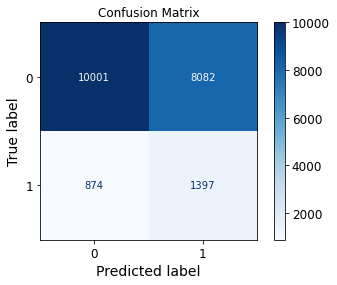

In [33]:


# Encode YES as 1 and NO as 0
y_test = y_test.replace({'<30': 1, 'NO': 0})



# Evaluate on test data
X_test_preprocessed = preprocessor.transform(X_test)
X_test_pca = pca.transform(X_test_preprocessed)
X_test_clustered = np.hstack((X_test_pca, kmeans.predict(X_test_pca).reshape(-1, 1)))

# Predictions on test data
y_test_pred = best_xgb.predict(X_test_clustered)
y_test_pred_proba = best_xgb.predict_proba(X_test_clustered)[:, 1]

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Testing Performance:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {test_accuracy:.4f}, ROC AUC: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


Best params

In [35]:
# Save the best parameters and model
import pickle

# Save the best model
model_filename = 'best_xgb_model1.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb, file)

print(f"Best XGBoost model saved as {model_filename}")



Best XGBoost model saved as best_xgb_model1.pkl


In [42]:
# Load the saved model
with open('best_xgb_model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

Threshold Analysis

/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


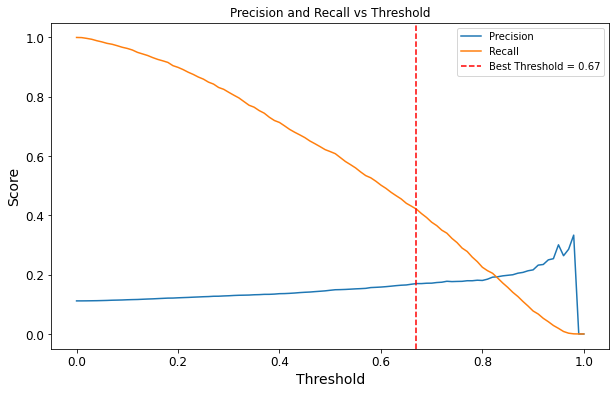

Best Threshold: 0.67


In [37]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,f1_score

# Threshold analysis
thresholds = np.arange(0.0, 1.01, 0.01)
results = []

for threshold in thresholds:
    y_pred = (y_test_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1': f1})

results_df = pd.DataFrame(results)

# Find the best threshold based on F1-score
best_row = results_df.loc[results_df['F1'].idxmax()]
best_threshold = best_row['Threshold']

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f"Best Threshold: {best_threshold:.2f}")


In [38]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import pandas as pd

# Assuming you have `y_prob` (predicted probabilities) and `y` (true labels)

# Define thresholds from 0.1 to 1.0
thresholds = np.arange(0.1, 1.1, 0.1)

# Calculate precision and recall and F1-score at each threshold
precision_recall_f1_data = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_recall_f1_data.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Convert to a DataFrame for easier display
precision_recall_df = pd.DataFrame(precision_recall_f1_data)

# Display the DataFrame
print(precision_recall_df)

# Optionally, save to an Excel file
precision_recall_df.to_excel("precision_recall_thresholds.xlsx", index=False)
print("Saved precision-recall thresholds to 'precision_recall_thresholds.xlsx'.")


   Threshold  Precision    Recall        F1
0        0.1   0.111619  1.000000  0.200822
1        0.2   0.114507  0.988111  0.205231
2        0.3   0.124684  0.911493  0.219361
3        0.4   0.141688  0.747248  0.238209
4        0.5   0.166237  0.539410  0.254149
5        0.6   0.186990  0.302510  0.231119
6        0.7   0.214939  0.124174  0.157410
7        0.8   0.232210  0.027301  0.048857
8        0.9   0.285714  0.000881  0.001756
9        1.0   0.000000  0.000000  0.000000
Saved precision-recall thresholds to 'precision_recall_thresholds.xlsx'.


/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Create a DataFrame with the results
results_df = pd.DataFrame(precision_recall_f1_data)

# Find the best threshold (maximizing F1-score)
best_threshold_row = results_df.loc[results_df['F1'].idxmax()]
best_threshold = best_threshold_row['Threshold']
print(f"Best Threshold: {best_threshold:.2f}, F1-Score: {best_threshold_row['F1']:.3f}")

Best Threshold: 0.50, F1-Score: 0.254


# Model Interpretation

In [47]:
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out())
# Combine numerical and categorical feature names
numerical_features = numerical_cols.tolist()
all_features = numerical_features + cat_one_hot_attribs

# Sort feature importance scores with their corresponding feature names
sorted_features = sorted(zip(loaded_model.feature_importances_, all_features), reverse=True)

# Print top 10 features
print("Top 10 Features by Importance:")
for importance, feature in sorted_features[:20]:
    print(f"{feature}: {importance:.4f}")

Top 10 Features by Importance:
time_in_hospital: 0.0802
age_derived: 0.0568
admission_type_id_Elective: 0.0544
number_outpatient: 0.0477
gender_Male: 0.0424
admission_type_id_Others: 0.0397
admission_type_id_Emergency: 0.0366
age_[30-40): 0.0338
age_[80-100): 0.0338
age_[60-70): 0.0327
age_[0-30): 0.0320
count_Up: 0.0318
admission_type_id_Urgent: 0.0313
race_Other: 0.0304
num_lab_procedures: 0.0293
race_AfricanAmerican: 0.0293
discharge_disposition_id_Discharged to home: 0.0288
gender_Female: 0.0284
number_emergency: 0.0282
number_diagnoses: 0.0272


### SHAP

In [75]:
import pandas as pd

# Step 1: Get column names after preprocessing
# Assuming 'preprocessor' has transformers for numerical and categorical features
num_features = preprocessor.named_transformers_['num'].feature_names_in_
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine numerical and categorical processed features
preprocessed_column_names = list(num_features) + list(cat_features)

# Step 2: Generate PCA column names
num_pca_components = pca.n_components_
pca_columns = [f"PC{i+1}" for i in range(num_pca_components)]

# Step 3: Add cluster label column
final_column_names = pca_columns + ["Cluster"]

# Step 4: Convert to DataFrame
X_test_clustered_df = pd.DataFrame(X_test_clustered, columns=final_column_names)
X_train_clustered_df = pd.DataFrame(X_train_clustered, columns=final_column_names)


# Display the DataFrame
#print(X_test_clustered_df.head())
print(X_train_clustered_df.head())




        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.492716 -1.879084 -1.028066  0.093654  0.199739  0.093658 -0.882113   
1  1.856168 -0.328445 -0.188321  0.124764  2.552111 -1.379297 -1.548124   
2  1.410773 -1.284731  1.073946 -1.290837  2.150989 -0.042863 -0.496548   
3  4.379405 -1.420905 -0.812827 -1.220193 -2.162528 -0.826624  0.556119   
4 -0.254148 -0.454231  2.854843 -1.917306 -2.662171  0.759842 -0.965864   

        PC8       PC9      PC10  ...      PC21      PC22      PC23      PC24  \
0  0.763700  0.412737  0.537753  ... -0.899378 -0.099809  0.371102  0.551693   
1 -0.462461 -0.551179  0.648140  ...  0.130492 -0.589763  0.446807 -0.339030   
2  0.870824  0.528811  0.592286  ... -0.060878 -0.340973  0.453345 -0.773642   
3 -0.062628  0.523129 -0.296681  ...  0.497404  0.923511 -0.718008 -0.048926   
4  0.656768 -0.474975  0.349359  ...  0.264747 -0.440220  0.259838 -0.175112   

       PC25      PC26      PC27      PC28      PC29  Cluster  
0 -0.

SHAP Summary plot

 99%|===================| 20242/20354 [01:55<00:00]        

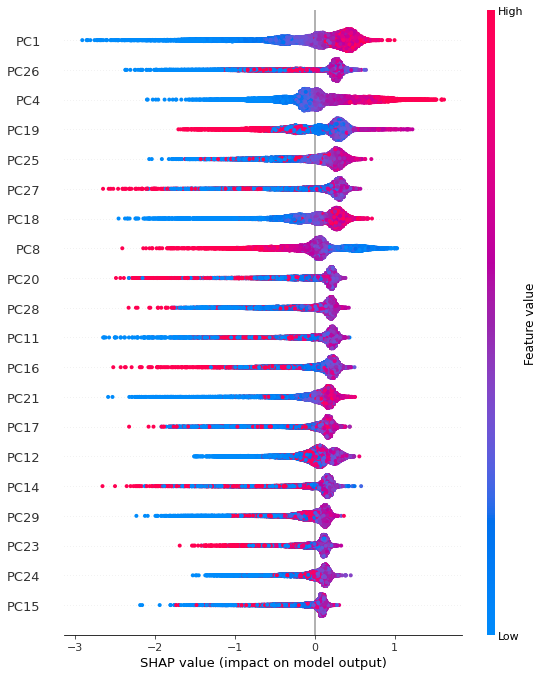

In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import shap
import matplotlib.pyplot as plt

# Assuming you already have these: model, X (features), y (true labels)
# Replace the following placeholders with your actual variables
# model = trained_model
# X = feature_dataframe
# y = true_labels

# 1. Calculate SHAP values
explainer = shap.TreeExplainer(loaded_model, X_test_clustered_df)  # Use TreeExplainer for tree-based models if needed
shap_values = explainer(X_test_clustered_df)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_clustered_df)


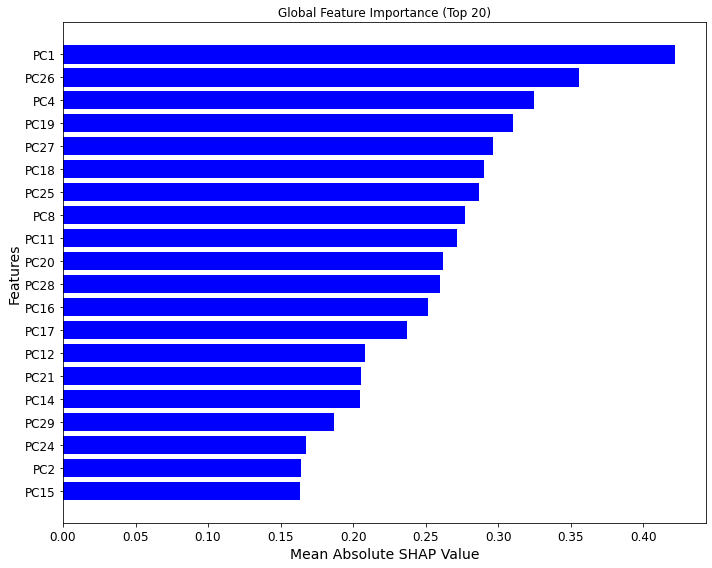

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `shap_values` and `X_test_clustered_df` are already computed
# Calculate mean absolute SHAP values for global importance
global_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    "Feature": X_test_clustered_df.columns,
    "Mean Absolute SHAP Value": global_importance
}).sort_values(by="Mean Absolute SHAP Value", ascending=False)

# Plot the global bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance["Feature"].iloc[:20], feature_importance["Mean Absolute SHAP Value"].iloc[:20], color="blue")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.title("Global Feature Importance (Top 20)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [143]:
# Compute mean signed SHAP values
mean_signed_shap = shap_values.values.mean(axis=0)
signed_feature_importance = pd.DataFrame({
    "Feature": X_test_clustered_df.columns,
    "Mean Signed SHAP Value": mean_signed_shap
}).sort_values(by="Mean Signed SHAP Value", ascending=False)

# Display features pushing toward class 1
print(signed_feature_importance[signed_feature_importance["Mean Signed SHAP Value"] > 0])


    Feature  Mean Signed SHAP Value
26     PC27                0.089353
3       PC4                0.086551
15     PC16                0.045073
10     PC11                0.025024
18     PC19                0.024825
13     PC14                0.012433
25     PC26                0.010227
17     PC18                0.008546
7       PC8                0.008394
16     PC17                0.008027
21     PC22                0.005822
29  Cluster                0.005183


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_test, y_test):
    # Generate predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Print classification metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # ROC AUC Score
    if y_prob is not None:
        print("ROC AUC Score:")
        print(roc_auc_score(y_test, y_prob))


In [50]:
# Retain only top features
top_features = ["PC1"]  # Replace with your actual top feature names
top_feature_set_train = X_train_clustered_df[top_features]  # Ensure you're using the training set
top_feature_set_test = X_test_clustered_df[top_features]  # Use the test set for evaluation

# Fit the model with the training set containing only the top features
loaded_model.fit(top_feature_set_train, y_train_balanced)

# Evaluate the model on the test set
print("Performance with Top Features Only:")
evaluate_model(loaded_model, top_feature_set_test, y_test)



NameError: name 'X_train_clustered_df' is not defined

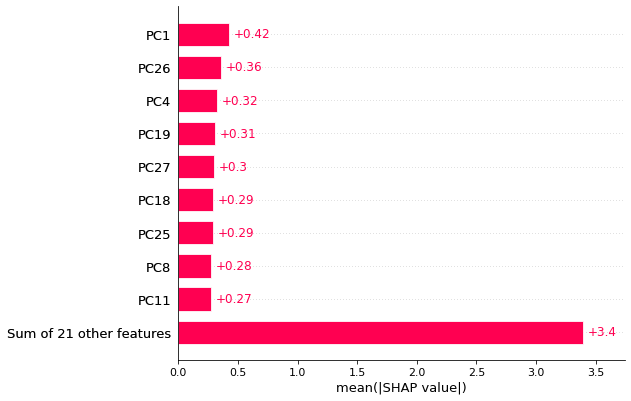

In [116]:
shap.plots.bar(shap_values)


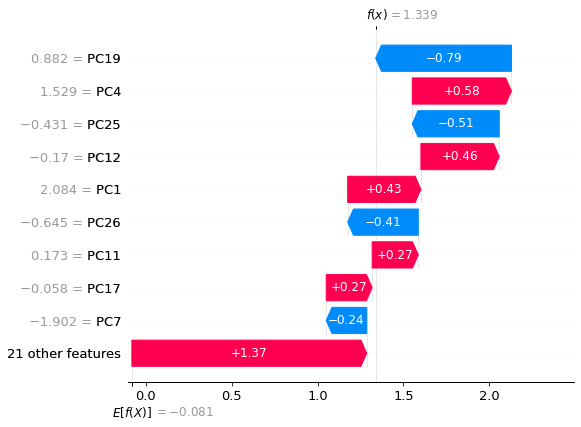

In [117]:
shap.plots.waterfall(shap_values[0])


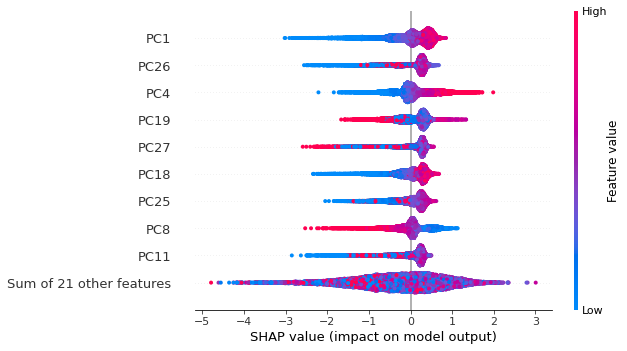

In [120]:
shap.plots.beeswarm(shap_values)


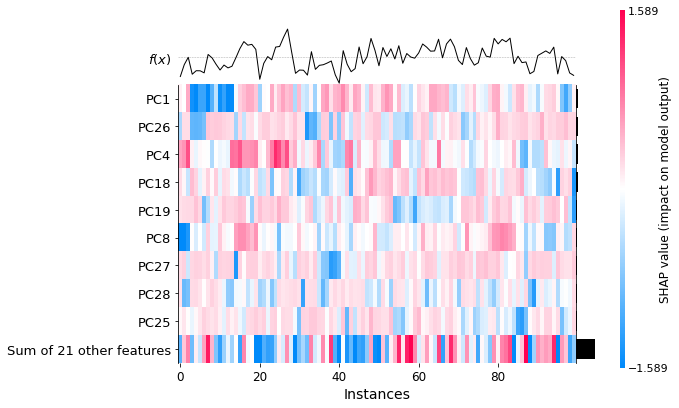

In [121]:
shap.plots.heatmap(shap_values[:100])


FEATURE_DEPENDENCE::independent does not support interactions!
Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.


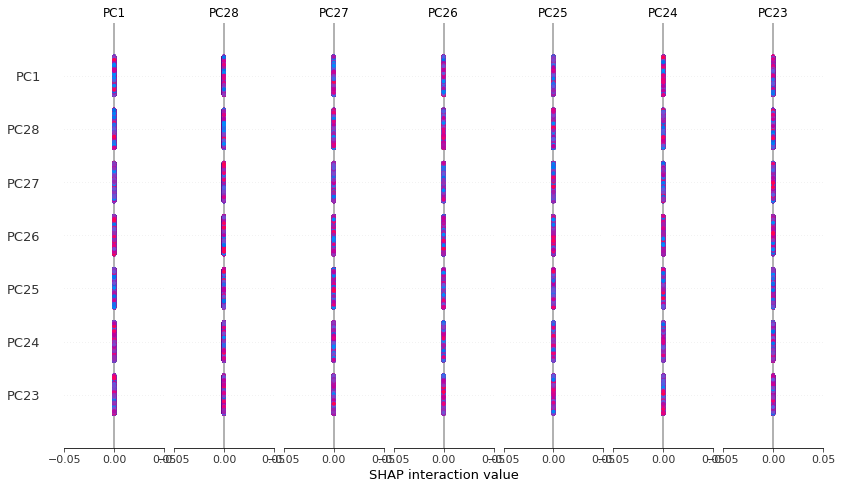

In [122]:
interaction_values = explainer.shap_interaction_values(X_test_clustered_df)
shap.summary_plot(interaction_values, X_test_clustered_df)


In [ ]:
original_feature_names = X_test.columns

# Get the feature names after preprocessing
# Numerical features
num_features = preprocessor.named_transformers_['num'].feature_names_in_

# Categorical features after one-hot encoding
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine numerical and categorical feature names
preprocessed_feature_names = list(num_features) + list(cat_features)

print(f"Shape of PCA components: {pca.components_.shape}")
print(f"Number of preprocessed features: {len(preprocessed_feature_names)}")



Shape of PCA components: (29, 93)
Number of preprocessed features: 93


In [155]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_, 
    columns=preprocessed_feature_names, 
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)


#pc8_loadings = loadings.loc["PC8"]
pc4_loadings = loadings.loc["PC1"]

print(pc4_loadings)

#print(pc8_loadings)



time_in_hospital      0.463662
num_lab_procedures    0.346382
num_medications       0.490052
number_outpatient     0.104541
number_emergency      0.119672
                        ...   
insulin_Up            0.069459
change_Ch             0.144372
change_No            -0.144372
diabetesMed_No       -0.083878
diabetesMed_Yes       0.083878
Name: PC1, Length: 93, dtype: float64


In [157]:
# Save PC8 loadings to a CSV file
#loadings.loc["PC8"].to_csv("pc8_loadings.csv")

# Save PC8 loadings to an Excel file
#loadings.loc["PC8"].to_excel("pc8_loadings.xlsx")

# Save PC8 loadings to a CSV file
loadings.loc["PC1"].to_csv("pc1_loadings.csv")

# Save PC8 loadings to an Excel file
#loadings.loc["PC4"].to_excel("pc4_loadings.xlsx")


In [ ]:
import pandas as pd

# Use the best threshold to generate predictions
final_predictions = (y_prob >= best_threshold).astype(int)

# Create a DataFrame that combines X_test, true labels, and predicted labels
output_df = X_test.copy()  # Start with the test features
output_df['True_Label'] = y_test  # Append the true labels
output_df['Predicted_Label'] = final_predictions  # Append the predicted labels

# Save the combined DataFrame to an Excel file
output_file = 'output_with_x_test_labels.xlsx'
output_df.to_excel(output_file, index=False)

print(f"Results with X_test, true labels, and predicted labels saved to {output_file}")


Results with X_test, true labels, and predicted labels saved to output_with_x_test_labels.xlsx


### ROC Curve for all models

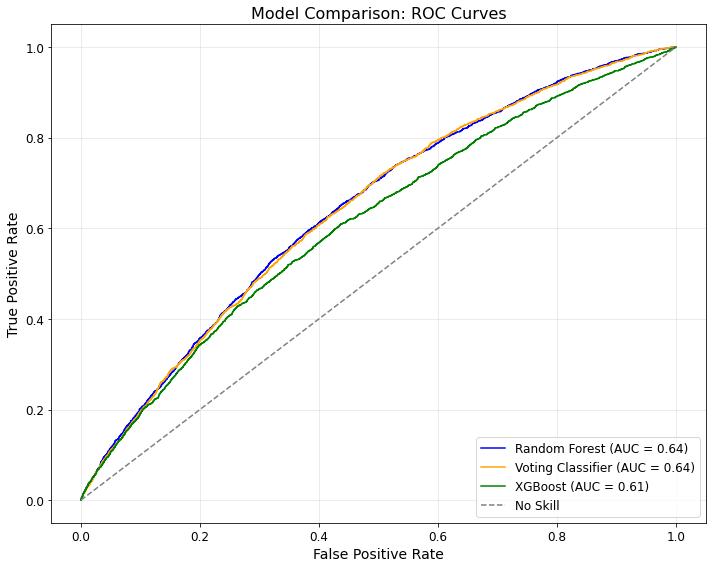

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Generate predicted probabilities for each model
rf_probs = best_rf.predict_proba(X_test_clustered)[:, 1]  # Random Forest
vc_probs = voting_clf.predict_proba(X_test_clustered)[:, 1]  # Voting Classifier
xgb_probs = best_xgb.predict_proba(X_test_clustered)[:, 1]  # XGBoost

# Compute ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
vc_fpr, vc_tpr, _ = roc_curve(y_test, vc_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute ROC-AUC scores
rf_auc = roc_auc_score(y_test, rf_probs)
vc_auc = roc_auc_score(y_test, vc_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(vc_fpr, vc_tpr, label=f'Voting Classifier (AUC = {vc_auc:.2f})', color='orange')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='No Skill')

# Customize the plot
plt.title('Model Comparison: ROC Curves', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Precision, Recall, F1 Score and ROC AUC across all models

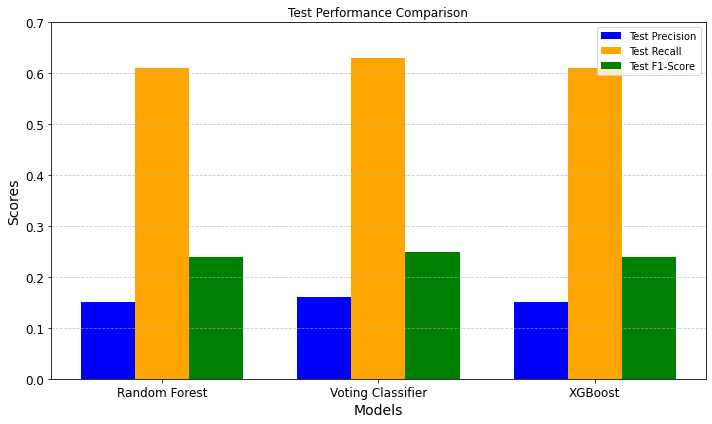

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

metrics_data = {
    "Model": ["Random Forest", "Voting Classifier", "XGBoost"],
    "Test Precision": [0.15, 0.16, 0.15],
    "Test Recall": [0.61, 0.63, 0.61],
    "Test F1-Score": [0.24, 0.25, 0.24],
    "Test ROC-AUC": [0.61, 0.60, 0.61]
}

df_metrics = pd.DataFrame(metrics_data)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

x = range(len(df_metrics["Model"]))
ax.bar([p - bar_width for p in x], df_metrics["Test Precision"], bar_width, label="Test Precision", color="blue")
ax.bar(x, df_metrics["Test Recall"], bar_width, label="Test Recall", color="orange")
ax.bar([p + bar_width for p in x], df_metrics["Test F1-Score"], bar_width, label="Test F1-Score", color="green")

plt.title("Test Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.xticks(x, df_metrics["Model"])
plt.ylim(0, 0.7)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [94]:
import pandas as pd

# Define the performance data for the table
performance_data = {
    "Model": [
        "Random Forest (Train)", 
        "Random Forest (Test)", 
        "Voting Classifier (Train)", 
        "Voting Classifier (Test)", 
        "XGBoost (Train)", 
        "XGBoost (Test)"
    ],
    "Precision": [0.96, 0.15, 0.95, 0.16, 0.88, 0.15],
    "Recall": [0.97, 0.61, 0.97, 0.63, 0.96, 0.61],
    "F1-Score": [0.96, 0.24, 0.96, 0.25, 0.87, 0.24],
    "Accuracy": [0.96, 0.56, 0.96, 0.58, 0.87, 0.56],
    "ROC AUC": [0.99, 0.61, 0.99, 0.61, 0.94, 0.61]
}

# Convert the data to a DataFrame
df_performance = pd.DataFrame(performance_data)

# Save the DataFrame to an Excel file
df_performance.to_excel("Model_Performance_Comparison.xlsx", index=False)


The End